# Application

## Imports

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%run 'library.ipynb'

## Load data

In [2]:
chl_95_0m = load_data("bgc", "chl", 1995, 1995, 0)
chl_96_200m = load_data("bgc", "chl", 1995, 1995, 200)

fe_9596_20m = load_data("bgc", "fe", 1995, 1995, 20)
fe_9596_100m = load_data("bgc", "fe", 1995, 1995, 100)

mlotst_9596 = load_data("phy", "mlotst", 1995, 1996, 20)

## Investigate value ranges

In [3]:
print(chl_95_0m.mean("time").quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'chl' (quantile: 21)> Size: 168B
array([9.24171507e-03, 4.65778284e-02, 5.72657418e-02, 6.57088049e-02,
       7.49983013e-02, 8.42184704e-02, 9.49009836e-02, 1.12442420e-01,
       1.36692244e-01, 1.58739872e-01, 1.83753155e-01, 2.10265229e-01,
       2.42946348e-01, 2.80469117e-01, 3.04037610e-01, 3.14516336e-01,
       3.31600338e-01, 3.56017964e-01, 4.02168733e-01, 5.09594551e-01,
       9.90186405e+00])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [4]:
print(chl_96_200m.mean("time").quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'chl' (quantile: 21)> Size: 168B
array([0.00393115, 0.00521141, 0.00639331, 0.00793217, 0.00976347,
       0.01232184, 0.01469722, 0.01684829, 0.01930746, 0.02242353,
       0.02634756, 0.03104929, 0.03633533, 0.04194231, 0.04822626,
       0.05524693, 0.06324705, 0.07162106, 0.0823826 , 0.09926734,
       0.7921707 ])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [5]:
print(fe_9596_20m.median("time").quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'fe' (quantile: 21)> Size: 168B
array([5.00334545e-06, 1.13021544e-05, 2.20710052e-05, 3.93073919e-05,
       6.20611168e-05, 6.99771626e-05, 7.00188481e-05, 7.20745462e-05,
       8.04521333e-05, 9.77566688e-05, 1.24918566e-04, 1.57296000e-04,
       2.06243274e-04, 2.94844755e-04, 4.08386657e-04, 5.39396264e-04,
       6.22071477e-04, 6.82101783e-04, 9.01218882e-04, 1.37168579e-03,
       9.73104965e-03])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [6]:
print(fe_9596_100m.median("time").quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'fe' (quantile: 21)> Size: 168B
array([5.00334545e-06, 1.13021544e-05, 2.20710052e-05, 3.93073919e-05,
       6.20611168e-05, 6.99771626e-05, 7.00188481e-05, 7.20745462e-05,
       8.04521333e-05, 9.77566688e-05, 1.24918566e-04, 1.57296000e-04,
       2.06243274e-04, 2.94844755e-04, 4.08386657e-04, 5.39396264e-04,
       6.22071477e-04, 6.82101783e-04, 9.01218882e-04, 1.37168579e-03,
       9.73104965e-03])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


In [7]:
print(mlotst_9596.median("time").quantile(np.linspace(0, 1, 21)))

<xarray.DataArray 'mlotst' (quantile: 21)> Size: 168B
array([  3.25130939,  14.3532934 ,  18.08810949,  21.10410104,
        23.50357704,  25.69702387,  27.78347607,  29.65642486,
        31.35397663,  33.05044932,  34.67189789,  36.28164196,
        38.01153145,  40.07023249,  42.65247746,  45.99318409,
        50.5942112 ,  57.32387419,  67.1883646 ,  81.87398624,
       403.17754364])
Coordinates:
  * quantile  (quantile) float64 168B 0.0 0.05 0.1 0.15 ... 0.85 0.9 0.95 1.0


## Visualize

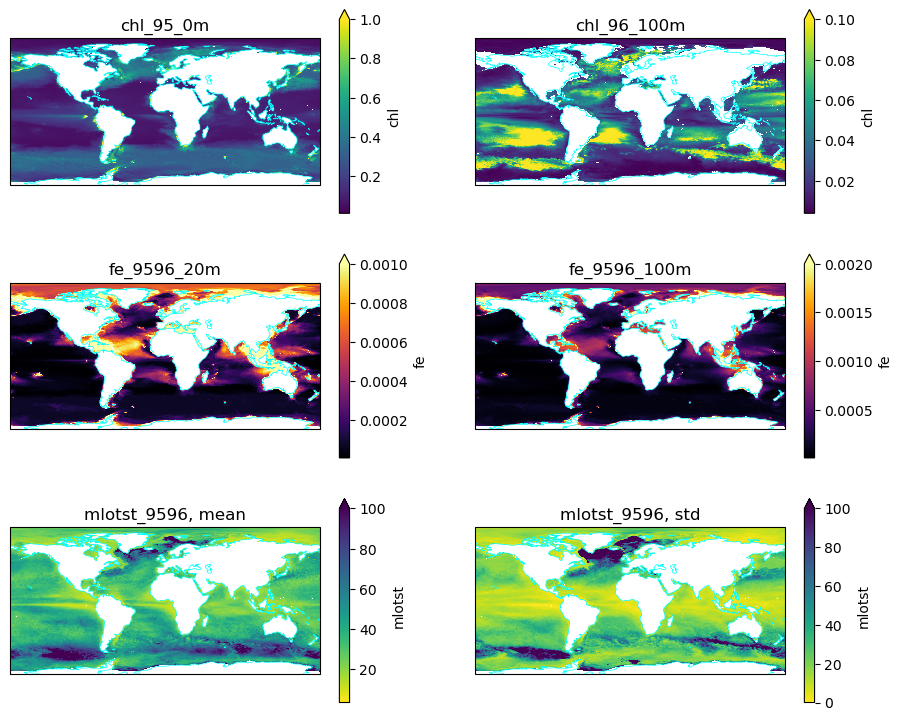

In [8]:
fig, axs = plt.subplots(3, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (11, 9))

chl_95_0m.mean("time").plot(vmax=1.0, x="longitude", y="latitude", ax=axs[0, 0], transform=ccrs.PlateCarree())
axs[0, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[0, 0].set_title("chl_95_0m")

chl_96_200m.mean("time").plot(vmax=0.1, x="longitude", y="latitude", ax=axs[0, 1], transform=ccrs.PlateCarree())
axs[0, 1].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[0, 1].set_title("chl_96_100m")

fe_9596_20m.median("time").plot(vmax=0.001, cmap="inferno", x="longitude", y="latitude", ax=axs[1, 0], transform=ccrs.PlateCarree())
axs[1, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[1, 0].set_title("fe_9596_20m")

fe_9596_100m.mean("time").plot(vmax=0.002, cmap="inferno", x="longitude", y="latitude", ax=axs[1, 1], transform=ccrs.PlateCarree())
axs[1, 1].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[1, 1].set_title("fe_9596_100m");

mlotst_9596.median("time").plot(vmax=100, cmap="viridis_r", x="longitude", y="latitude", ax=axs[2, 0], transform=ccrs.PlateCarree())
axs[2, 0].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[2, 0].set_title("mlotst_9596, mean");

mlotst_9596.std("time").plot(vmax=100, cmap="viridis_r", x="longitude", y="latitude", ax=axs[2, 1], transform=ccrs.PlateCarree())
axs[2, 1].add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='cyan')
axs[2, 1].set_title("mlotst_9596, std");